In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("E:/Workspace/Datasets/placement_NEW.csv")

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

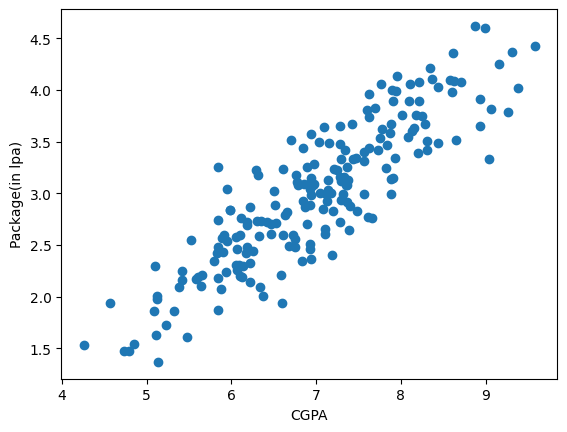

In [5]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package(in lpa)")  

In [6]:
X = df[["cgpa"]]    # DataFrame → 2D
y = df["package"]
print(X.shape)  # (140, 1)
print(y.shape)  # (140,)
  # Series → 1D


(200, 1)
(200,)


In [7]:
X.shape

(200, 1)

In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train,y_train

(     cgpa
 169  9.31
 97   5.98
 31   8.10
 12   8.94
 35   6.87
 ..    ...
 106  6.13
 14   7.73
 92   7.90
 179  7.14
 102  5.13
 
 [140 rows x 1 columns],
 169    4.37
 97     2.84
 31     3.89
 12     3.65
 35     2.87
        ... 
 106    2.19
 14     3.42
 92     4.00
 179    3.03
 102    1.37
 Name: package, Length: 140, dtype: float64)

In [12]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)


<class 'pandas.core.frame.DataFrame'> (140, 1)
<class 'pandas.core.series.Series'> (140,)


In [13]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [14]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [16]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
79     3.00
197    3.24
38     4.36
24     2.71
122    2.01
195    2.46
29     3.49
19     2.83
143    1.54
86     2.77
114    1.87
173    2.56
5      2.99
126    2.60
117    2.99
73     4.03
140    3.15
98     3.83
172    2.51
96     2.61
Name: package, dtype: float64

In [17]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.21564795])

Text(0, 0.5, 'Package(in lpa)')

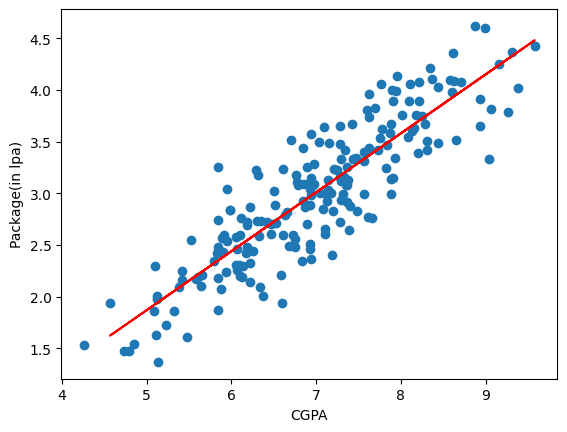

In [18]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("CGPA")
plt.ylabel("Package(in lpa)") 

In [19]:
m=lr.coef_ # slope
m

array([0.57018094])

In [20]:
b=lr.intercept_ # y-intercept
b

np.float64(-0.980883767663578)

## Multiple Linear Regression

In [35]:
import plotly.express as px
from sklearn.datasets import make_regression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
x,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [37]:
df=pd.DataFrame({"feature1":x[:,0],"feature2":x[:,1],"target":y})

In [38]:
df.head()

,feature1,feature2,target
0,0.105916,0.513035,124.693966
1,-2.024357,1.239383,24.534924
2,0.534274,-0.826008,-186.385325
3,-0.309833,-0.827892,-92.508395
4,0.921640,-1.482349,-23.581559


In [39]:
df.shape

(100, 3)

In [40]:
fig=px.scatter_3d(df,x="feature1",y="feature2",z="target")
fig.show()

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [44]:
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
y_pred=lr.predict(x_test)

In [47]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))  
print("R2 Score",r2_score(y_test,y_pred))

MAE 40.89069901300786
MSE 2174.146479816196
R2 Score 0.7317829702445833
